In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('data/churn.csv', index_col=0)
labels = df.churn
features = df.drop('churn', axis=1)
features.head()

,host_is_superhost,price,room_type,accommodates,review_scores_cleanliness,review_scores_location,host_identity_verified,host_response_time,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,calendar_updated,minimum_nights,number_of_reviews,reviews_per_month,days_since_last_review
19444,f,200.0,Entire home/apt,3,10.0,10.0,f,a few days or more,0.0,f,243.0,1.0,4 months ago,7,4,0.0,850.0
1520,f,450.0,Entire home/apt,4,10.0,10.0,f,a few days or more,0.0,f,208.0,1.0,2 weeks ago,3,7,0.0,505.0
1517,f,28.0,Shared room,1,0.0,0.0,f,a few days or more,0.0,f,364.0,1.0,6 weeks ago,1,0,0.0,3650.0
21691,f,48.0,Private room,2,8.0,6.0,f,a few days or more,0.0,f,143.0,1.0,4 months ago,1,1,0.0,612.0
21706,f,160.0,Private room,2,0.0,0.0,f,a few days or more,0.0,f,365.0,1.0,2 months ago,1,0,0.0,3650.0


In [3]:
drop_columns = ['host_response_time', 
                'calendar_updated',
                'days_since_last_review']

In [4]:
features.drop(drop_columns, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77201 entries, 19444 to 0
Data columns (total 14 columns):
host_is_superhost                 77201 non-null object
price                             77201 non-null float64
room_type                         77201 non-null object
accommodates                      77201 non-null int64
review_scores_cleanliness         77201 non-null float64
review_scores_location            77201 non-null float64
host_identity_verified            77201 non-null object
host_response_rate                77201 non-null float64
host_has_profile_pic              77201 non-null object
availability_365                  77201 non-null float64
calculated_host_listings_count    77201 non-null float64
minimum_nights                    77201 non-null int64
number_of_reviews                 77201 non-null int64
reviews_per_month                 77201 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 8.8+ MB


In [5]:
pd.get_dummies(features.drop(drop_columns, axis=1))

,price,accommodates,review_scores_cleanliness,review_scores_location,host_response_rate,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,reviews_per_month,host_is_superhost_f,host_is_superhost_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_identity_verified_f,host_identity_verified_t,host_has_profile_pic_f,host_has_profile_pic_t
19444,200.0,3,10.0,10.0,0.0,243.0,1.0,7,4,0.00,1,0,1,0,0,1,0,1,0
1520,450.0,4,10.0,10.0,0.0,208.0,1.0,3,7,0.00,1,0,1,0,0,1,0,1,0
1517,28.0,1,0.0,0.0,0.0,364.0,1.0,1,0,0.00,1,0,0,0,1,1,0,1,0
21691,48.0,2,8.0,6.0,0.0,143.0,1.0,1,1,0.00,1,0,0,1,0,1,0,1,0
21706,160.0,2,0.0,0.0,0.0,365.0,1.0,1,0,0.00,1,0,0,1,0,1,0,1,0
1613,80.0,2,0.0,0.0,0.0,14.0,1.0,1,0,0.00,1,0,0,1,0,1,0,1,0
21724,80.0,3,6.0,4.0,0.0,365.0,1.0,2,1,0.00,1,0,0,1,0,1,0,1,0
21720,120.0,4,6.0,10.0,0.0,0.0,1.0,5,1,0.00,1,0,1,0,0,1,0,1,0
19452,199.0,2,9.0,10.0,0.0,365.0,1.0,2,6,0.00,1,0,1,0,0,1,0,1,0
21690,89.0,2,0.0,0.0,0.0,362.0,1.0,1,0,0.00,1,0,0,1,0,1,0,1,0


In [6]:
feature_matrix = pd.get_dummies(features.drop(drop_columns, axis=1)).as_matrix()
feature_matrix

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[200.,   3.,  10., ...,   0.,   1.,   0.],
       [450.,   4.,  10., ...,   0.,   1.,   0.],
       [ 28.,   1.,   0., ...,   0.,   1.,   0.],
       ...,
       [200.,   3.,  10., ...,   1.,   0.,   1.],
       [235.,   2.,  10., ...,   0.,   0.,   1.],
       [ 49.,   5.,  10., ...,   1.,   0.,   1.]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.3)

In [8]:
print(len(X_train))
print(len(X_test))

54040
23161


In [9]:
# create model (estimator) object
model = LogisticRegression(penalty='l1')
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# fit model to training data
model.fit(X_train, y_train)

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# make predictions
predictions = model.predict(X_test)
predictions

array([ True,  True,  True, ..., False, False,  True])

In [12]:
# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
accuracy

0.7165493717887829

In [13]:
model.score(X_test, y_test)

0.7165493717887829

In [14]:
df.churn.value_counts()

True     44626
False    32575
Name: churn, dtype: int64

## Class Imbalance

In [15]:
down_sample = df[df.churn == False].sample(32575)
sub_sample = pd.concat([down_sample, df[df.churn == True].sample(32575)])

In [16]:
sub_sample.churn.value_counts()

True     32575
False    32575
Name: churn, dtype: int64

In [17]:
labels = sub_sample.churn
drop_columns = ['host_response_time', 
                'calendar_updated',
                'days_since_last_review', 'churn']
features = sub_sample.drop(drop_columns, axis=1)
feature_matrix = pd.get_dummies(features).as_matrix()

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.3)

In [19]:
# create model (estimator) object
clf = LogisticRegression(penalty='l1', solver='liblinear')

# fit model to training data
clf.fit(X_train, y_train)

# make predictions
predictions = clf.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
print(accuracy)

0.7209004860578153


In [20]:
clf.score(X_test, y_test)

0.7209004860578153

In [21]:
print(f"Training took {clf.n_iter_[0]} iterations, since this is less than {clf.max_iter} it has converged")

Training took 24 iterations, since this is less than 100 it has converged


## k-fold Cross Validation

In [22]:
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [23]:
scores

array([0.72840859, 0.71826354, 0.71672879, 0.72111379, 0.73530702,
       0.72565789, 0.72368421, 0.71929825, 0.72017544, 0.70263158])

In [24]:
scores.mean()

0.721126909576699

In [25]:
scores.var()

6.550370923512193e-05

In [26]:
clf.score(X_test, y_test)

0.7209004860578153

In [27]:
model = KNeighborsClassifier()
clf = model.fit(X_train, y_train)
clf.score(X_test, y_test)

0.667434126375032

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
clf = model.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7360450243028908

In [29]:
clf.feature_importances_

array([0.1299414 , 0.04664061, 0.03645258, 0.02229546, 0.07876436,
       0.19820288, 0.03740159, 0.05032668, 0.07191607, 0.10393096,
       0.00210905, 0.0023844 , 0.00755728, 0.00587873, 0.00289189,
       0.01721217, 0.00669308, 0.07519909, 0.10420172])

In [30]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[7972 1812]
 [3347 6414]]


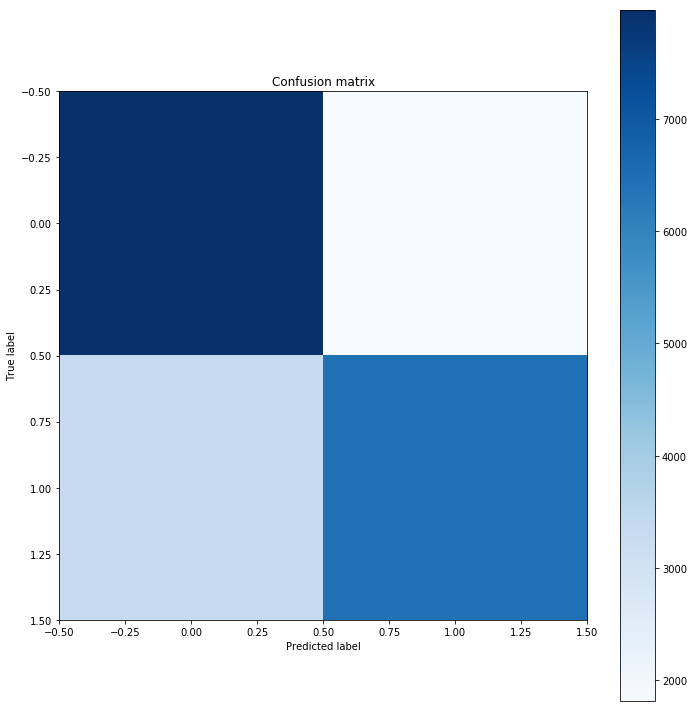

In [31]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm)

In [32]:
y_pred

array([ True,  True,  True, ...,  True,  True, False])

In [33]:
y_score

array([[0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       ...,
       [0. , 1. ],
       [0.4, 0.6],
       [0.5, 0.5]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.81      0.76      9784
        True       0.78      0.66      0.71      9761

   micro avg       0.74      0.74      0.74     19545
   macro avg       0.74      0.74      0.73     19545
weighted avg       0.74      0.74      0.73     19545



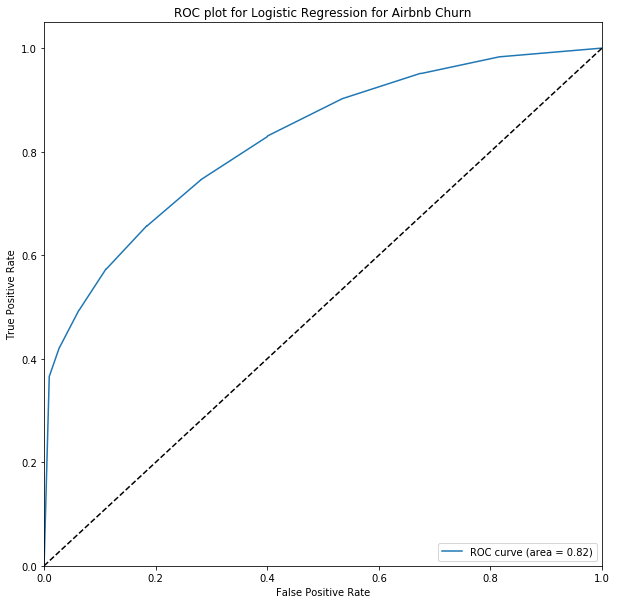

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for Logistic Regression for Airbnb Churn')
plt.legend(loc="lower right")
plt.show()

In [36]:
def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC plot for Logistic Regression for Airbnb Churn')
    plt.legend(loc="lower right")
    plt.show()

In [37]:
scores = cross_validate(clf, X_train, y_train, return_train_score=True, cv=10)

In [38]:
scores

{'fit_time': array([0.45, 0.4 , 0.42, 0.42, 0.42, 0.39, 0.4 , 0.4 , 0.4 , 0.4 ]),
 'score_time': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
 'test_score': array([0.75, 0.73, 0.74, 0.73, 0.75, 0.74, 0.75, 0.74, 0.74, 0.74]),
 'train_score': array([0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98])}

In [39]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=3,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(20, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [40]:
clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000)

<module 'matplotlib.pyplot' from '/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

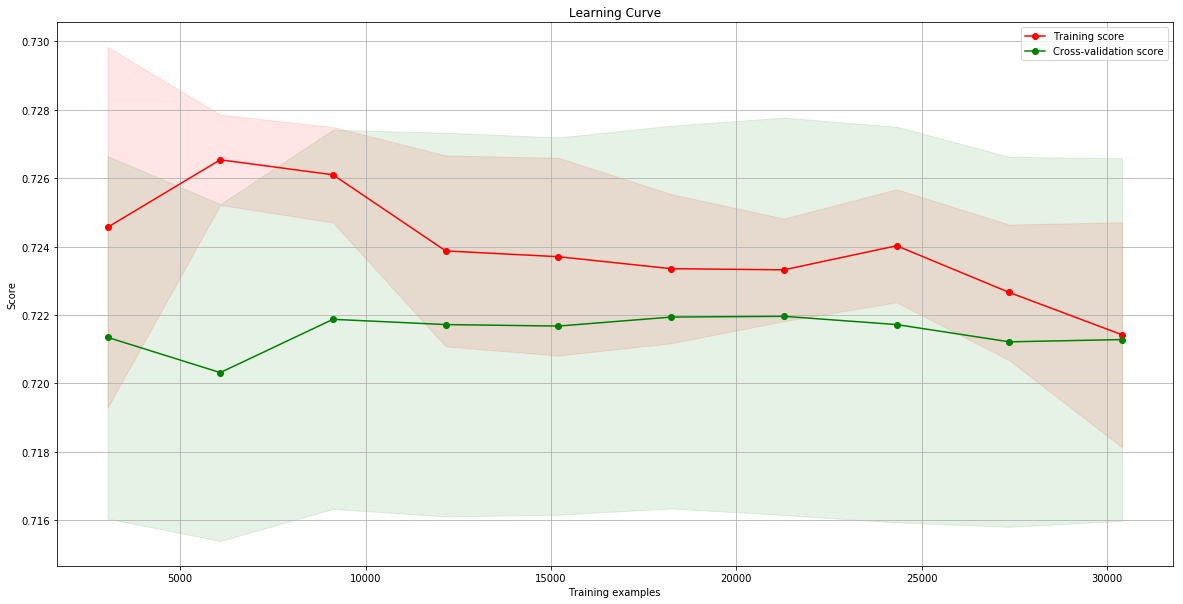

In [41]:
plot_learning_curve(clf, 'Learning Curve', X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10))

<module 'matplotlib.pyplot' from '/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

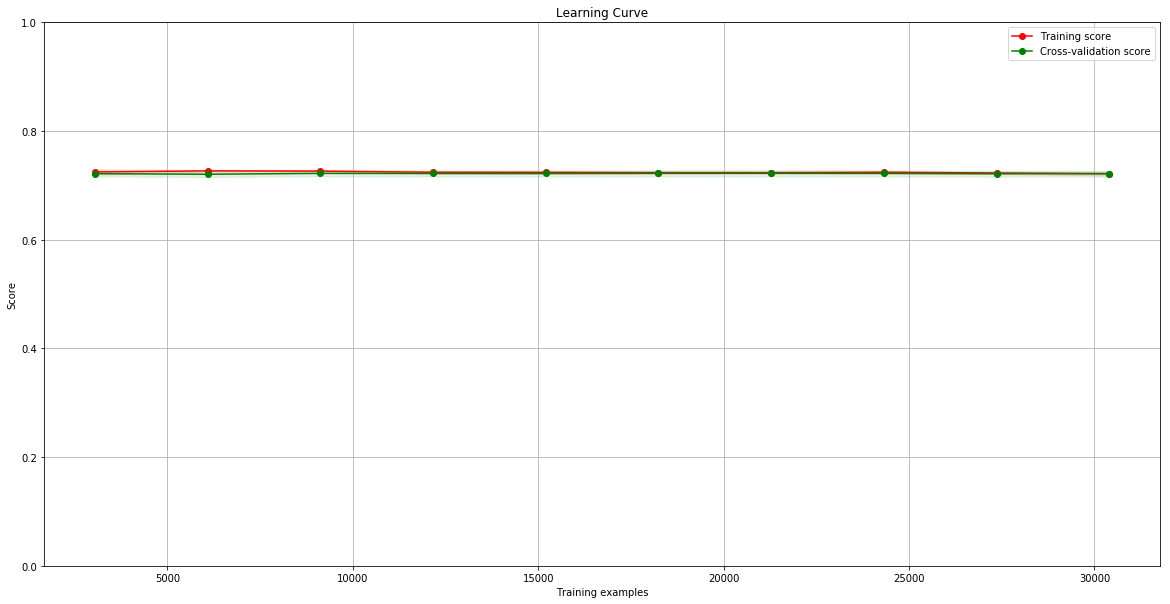

In [42]:
plot_learning_curve(clf, 'Learning Curve', X_train, y_train, ylim=(0, 1.), train_sizes=np.linspace(.1, 1.0, 10))

# Feature Engineering and Normalization

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer

In [44]:
features.head()

,host_is_superhost,price,room_type,accommodates,review_scores_cleanliness,review_scores_location,host_identity_verified,host_response_rate,host_has_profile_pic,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,reviews_per_month
4884,f,100.0,Private room,2,8.0,10.0,f,0.0,t,365.0,1.0,1,2,0.10
26253,f,175.0,Entire home/apt,4,8.0,9.0,f,87.0,t,293.0,1.0,1,44,1.25
3968,f,75.0,Private room,1,6.0,8.0,t,100.0,t,14.0,3.0,1,1,0.10
11844,f,74.0,Entire home/apt,2,9.0,10.0,f,0.0,t,0.0,1.0,16,4,0.53
9788,f,185.0,Entire home/apt,8,8.0,9.0,f,50.0,t,331.0,1.0,3,3,0.68


In [45]:
categorical_columns = ['host_is_superhost', 'room_type', 'host_identity_verified', 'host_has_profile_pic']

In [46]:
transformer = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder=StandardScaler(), 
    sparse_threshold=0
)

In [47]:
transformer

ColumnTransformer(n_jobs=None,
         remainder=StandardScaler(copy=True, with_mean=True, with_std=True),
         sparse_threshold=0, transformer_weights=None,
         transformers=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True), ['host_is_superhost', 'room_type', 'host_identity_verified', 'host_has_profile_pic'])])

In [48]:
transformer.fit_transform(features)

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.  ,  0.  ,  0.  , ..., -0.22, -0.39, -0.61],
       [ 1.  ,  0.  ,  1.  , ..., -0.22,  1.63,  0.4 ],
       [ 1.  ,  0.  ,  0.  , ..., -0.22, -0.44, -0.61],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., -0.22, -0.44,  0.18],
       [ 1.  ,  0.  ,  0.  , ..., -0.22, -0.2 ,  2.66],
       [ 1.  ,  0.  ,  1.  , ...,  1.67,  0.23,  0.26]])

In [49]:
pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression(penalty='l1'))])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [51]:
# fit model to training data
pipeline.fit(X_train, y_train)

# make predictions
predictions = pipeline.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
print(accuracy)

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7259401381427475


/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)
/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


Confusion matrix
[[5467 1114]
 [2457 3992]]


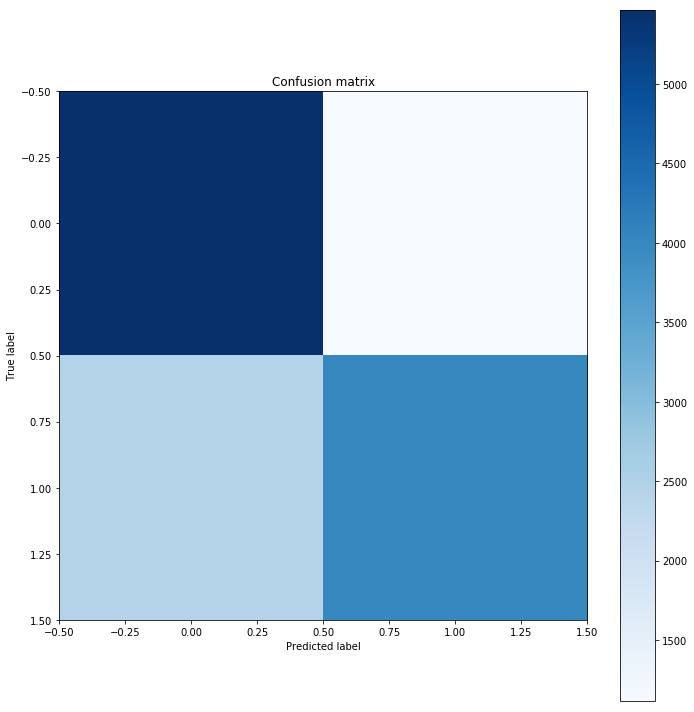

In [52]:
y_pred = pipeline.predict(X_test)
y_score = pipeline.predict_proba(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm)

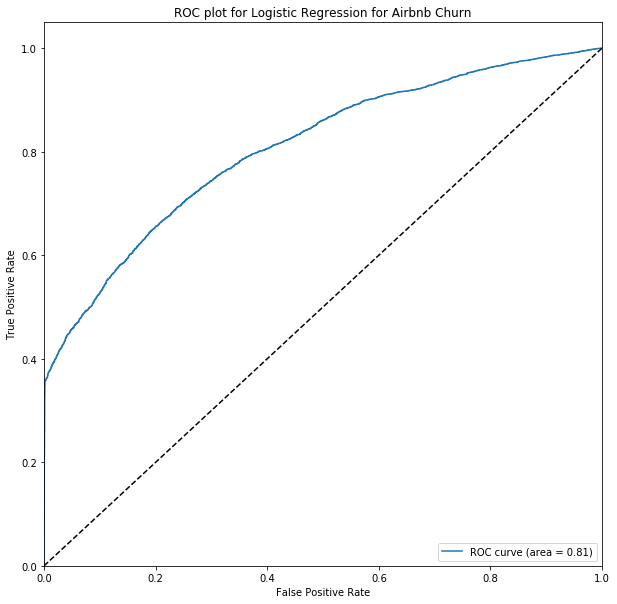

In [53]:
plot_roc(y_test, y_score)

### Original Unscaled Features

In [54]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2)

# create model (estimator) object
clf = LogisticRegression(penalty='l1')

# fit model to training data
clf.fit(X_train, y_train)

# make predictions
predictions = clf.predict(X_test)

# evaluate model
accuracy = (predictions == y_test).sum() / len(y_test)
print(accuracy)

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.721105141980046


Confusion matrix, without normalization
[[5413 1105]
 [2529 3983]]


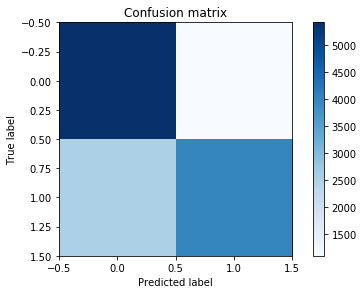

In [55]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

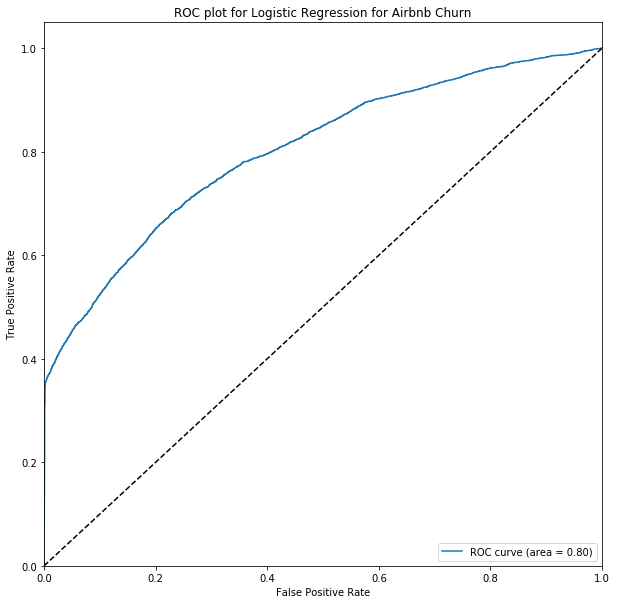

In [56]:
plot_roc(y_test, y_score)

# Model Selection and Hyperparameter Optimization

In [57]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2)

In [58]:
# See also https://scikit-learn.org/stable/modules/grid_search.html

scores = np.zeros((2, 6))
penalties = ['l1', 'l2']
regularization = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

for i, penalty in enumerate(penalties):
    for j, C in enumerate(regularization):
        clf = LogisticRegression(penalty=penalty, C=C,  solver='liblinear', max_iter=1500)

        scores[i, j] = cross_val_score(clf, X_train, y_train, cv=5).mean()

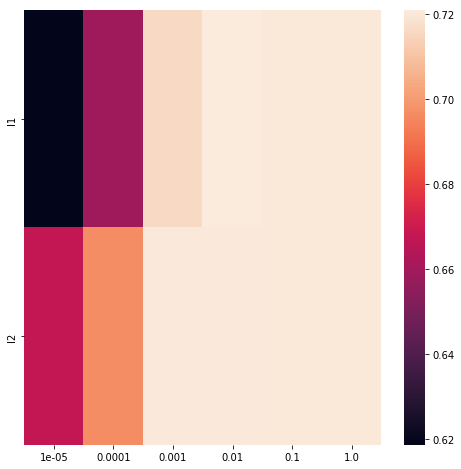

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(scores, xticklabels=regularization, yticklabels=penalties)

In [60]:
# Prefer L1 for sparsity constraints
scores[0].argmax()

# Create model with best performing hyperparameters
clf = LogisticRegression(penalty='l1', C=regularization[3])

# Fit on all of your (training) data
clf.fit(X_train, y_train)

# Evaluate on Holdout set
print(clf.score(X_test, y_test))

/Users/jonathandinu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7243284727551803
